In [1]:
!pip install -q vartests

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as am
import vartests

0.1.9


In [3]:
data = pd.read_csv('study_data.csv', header=0, names=['Date', 'SPX', 'DAX', 'WIG20', 'EURUSD'], index_col='Date', parse_dates=['Date'])

In [4]:
columns = ['SPX', 'DAX', 'WIG20', 'EURUSD']
freq_ccc = pd.read_csv('ccc_garch.csv', header=0, names=columns)

In [5]:
freq_ccc = pd.DataFrame(freq_ccc)
print(freq_ccc)

        SPX       DAX     WIG20    EURUSD
0  1.000000  0.567628  0.388155  0.077779
1  0.567628  1.000000  0.538527 -0.078460
2  0.388155  0.538527  1.000000  0.067600
3  0.077779 -0.078460  0.067600  1.000000


In [6]:
freq_dcc = pd.read_csv('dcc_garch.csv', parse_dates=['Date'], index_col='Date')
freq_dcc = pd.DataFrame(freq_dcc)
dcc_columns = ['SPX_DAX', 'SPX_WIG20', 'SPX_EURUSD', 'DAX_WIG20', 'DAX_EURUSD', 'WIG20_EURUSD']

<Figure size 100x100 with 0 Axes>

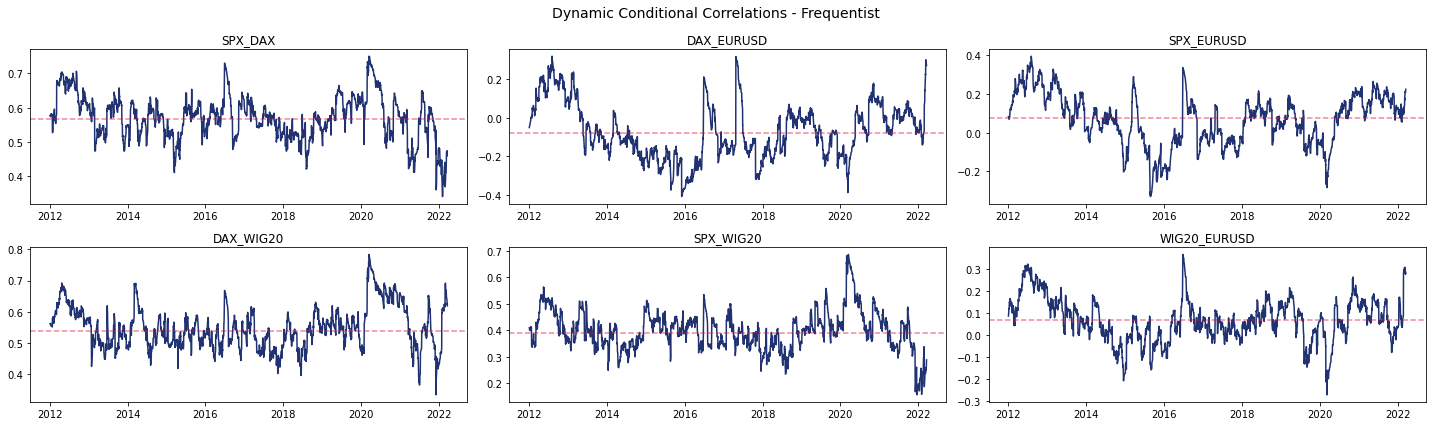

In [7]:
#plot DCC/CCC models
plt.figure(figsize=(1,1), dpi=100)
fig, ax = plt.subplots(2, 3, figsize=(20,6))
a = 0
plt.suptitle('Dynamic Conditional Correlations - Frequentist', fontsize=14)

for i in dcc_columns:
    ax[a%2][a%3].plot(freq_dcc.index, freq_dcc[i], c='#203271')
    ax[a%2][a%3].set_title(dcc_columns[a])
    a +=1

c = 'crimson'
ax[0][0].axhline(y=freq_ccc['SPX'].iloc[1], c=c, alpha=0.5, linestyle = '--') #SPXDAX
ax[1][1].axhline(y=freq_ccc['SPX'].iloc[2], c=c, alpha=0.5, linestyle = '--') #SPXWIG20
ax[0][2].axhline(y=freq_ccc['SPX'].iloc[3], c=c, alpha=0.5, linestyle = '--') #SPXEURUSD
ax[0][1].axhline(y=freq_ccc['DAX'].iloc[3], c=c, alpha=0.5, linestyle = '--') #DAXEURUSD
ax[1][0].axhline(y=freq_ccc['DAX'].iloc[2], c=c, alpha=0.5, linestyle = '--') #DAXWIG20
ax[1][2].axhline(y=freq_ccc['WIG20'].iloc[3], c=c, alpha=0.5, linestyle = '--') #SPXEURUSD

plt.tight_layout()
plt.show()

fig.savefig('CCC-DCC.png', bbox_inches='tight')